In [1]:
# dependancies
import pandas
import matplotlib.pyplot as plt

In [2]:
# this cell reserved for testing
with open("final_with_totals.csv") as inbox:
    DF = pandas.read_csv(inbox)
DF.head()

,Unnamed: 0,Player_Id,Team_Id,Name,Year,Position,Games_Played,passing yards,passing touchdowns,passing interceptions,rushing yards,rushing touchdowns,fumbles,receiving yards,receiving touchdowns,receptions,kick returns,punt returns,total annual points
0,0,05b0c05e-ec5b-4c41-9ff6-55ffcbdab955,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Alex Van Pelt,2000,QB,1,2.68,0,0,0.0,0,0,0.0,0,0,0,0,2.68
1,1,1454f252-2a45-4a4d-bce6-c9a4958514cb,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Jeremy McDaniel,2000,WR,16,0.00,0,0,0.0,0,0,69.7,12,43,0,0,81.70
2,2,229596c9-a494-4293-8bbc-76203995b92f,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Shawn Bryson,2000,RB,16,0.00,0,0,59.1,0,-2,27.1,12,32,0,0,96.20
3,3,34147754-f18a-4071-9895-dd541c78260e,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Doug Flutie,2000,QB,11,68.00,32,-6,16.1,6,-10,0.0,0,0,0,0,106.10
4,4,39536e35-74fb-4287-8550-1304b16256a5,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Jay Riemersma,2000,TE,12,0.00,0,0,0.0,0,-2,37.2,30,31,0,0,65.20


In [3]:
def setup(df, x, y, function):
    """Takes a dataframe, two column names from it and a lambda function to be applied to a loc of the dataframe to return an int. returns a dataframe set up per spec"""
    result = {}
    for each in df[x].unique():
        result[each] = {}
        for other in df[y].unique():
            ball = df.loc[df[x] == each]
            ball = ball.loc[ball[y] == other]
            result[each][other] = function(ball)
    return pandas.DataFrame(result)

In [4]:
# this cell reserved for testing
setup(DF, "Position", "Year", lambda x: x["total annual points"].sum()).head()

,FB,QB,RB,TE,WR
2000,1166.90,4070.30,6973.98,2189.62,8199.56
2001,1343.90,3647.34,6391.50,2241.90,8445.72
2002,1004.60,3864.26,7785.50,2501.36,8877.52
2003,831.70,3084.66,7600.56,2446.80,8095.86
2004,977.34,3630.04,7477.76,3004.50,8631.34


In [7]:
def pretty_picture(df, x_title, y_title, title):
    """Takes a dataframe of the format we're using for our results. sets it up as a matplotlib plot. returns True if successful"""
    colorlist = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#d2f53c", "#fabebe", "#000080", "#ffd8b1", "#808000", "#aaffc3", "#800000", "#fffac8", "#aa6e28", "#e6beff", "#008080"]
    markerlist = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s" "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    ball = []
    plt.figure(figsize = (22, 10))
    for each in range(len(df.columns)):
        ball.append(plt.errorbar(df.index, df[df.columns[each]], label = df.columns[each], color = colorlist[each], marker = markerlist[each], yerr = df.sem(axis = 0)[each]))
    plt.legend(loc = "best")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.grid(alpha = .25)

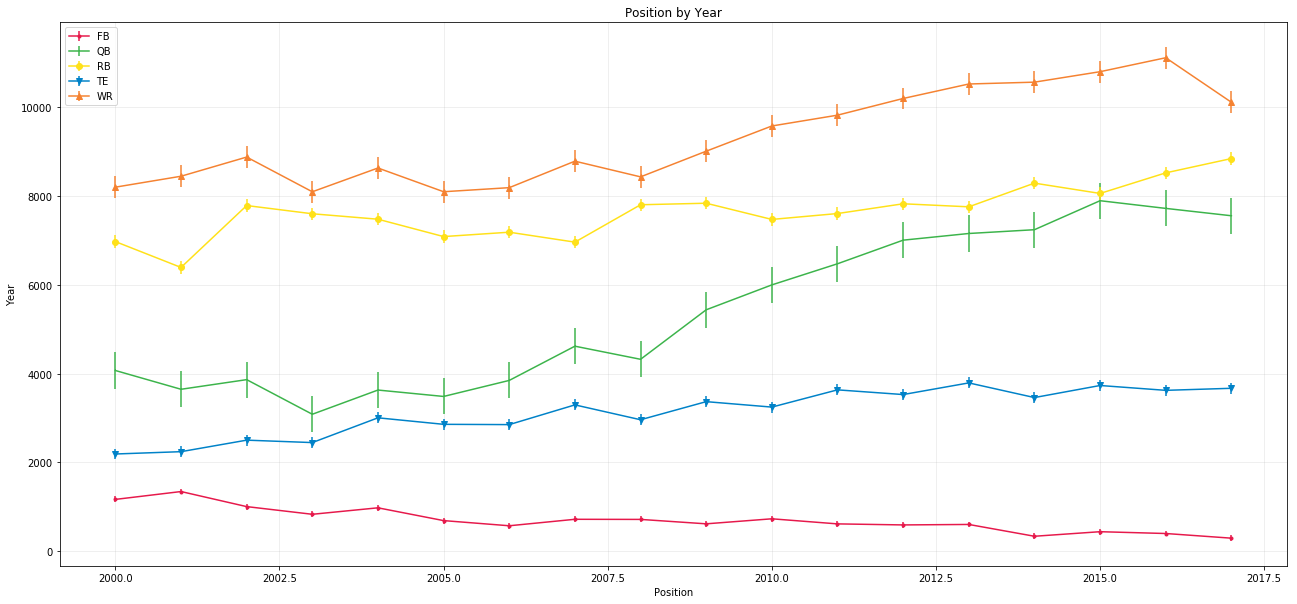

In [8]:
test_data = setup(DF, "Position", "Year", lambda x: x["total annual points"].sum())
pretty_picture(test_data, "Position", "Year")
plt.show()